# House price prediction

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [12]:
df = pd.read_csv("bengaluru_house_prices.csv")

In [13]:
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [14]:
df.shape

(13320, 9)

In [15]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [18]:
df2=df.drop(['area_type','society','balcony','availability'],axis='columns') #bu kolonları çıkardım bana gerekli olanları kaldı
df2.head(10)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


In [19]:
#şimdi boş değer olup olmadıgına bakıcam 
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [20]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [22]:
df3.shape #boş değer yok şuan

(13246, 5)

In [25]:
df3['size'].unique()  #hem bhk hemde beedroom tipi var bu bir sorun olucak 


array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [31]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Ozkan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df3.head() #gördügünüz gibi sağ tarafta oda sayısını bhk kolonu altında alabildik

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [34]:
df3['bhk'].unique() #bhk değerlerine bakalım

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [35]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [37]:
df3.total_sqft.unique() #aşagıda 1133-1384 metre2 arası bunu değiştirmemiz lazım

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [45]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [51]:
df3[~df3['total_sqft'].apply(is_float)].head(10) #altta 34.65Sq.meter var onu değiştirmek lazım

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [59]:
def convert_sqft_to_num(x):
    tokens =x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 
    
#burdaki kodumuz gelen tokeni aralık varsa ö:20-23 gibi bunun ortalamasını alıcak
#aralık yoksa float döncek  bunun dışındakiler mesela 34.SQ.METER gibi bununa NONE DÖNDÜRCEK YANİ BİŞEY DÖNMİCEK


In [54]:
convert_sqft_to_num('2166') #normal sayı girince float döndürdü 

2166.0

In [60]:
convert_sqft_to_num('2100 - 2104') #aralık girince ortalaması alındı

2102.0

In [61]:
convert_sqft_to_num('23.Perch') #none döndü

In [62]:
df4=df3.copy()
df4['total_sqrf']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,price,bhk,total_sqrf
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0


In [63]:
df4.loc[30] #gördügümüz gibi total_sqrf 2475 oldu

location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
bath                    4
price                 186
bhk                     4
total_sqrf           2475
Name: 30, dtype: object

In [74]:
df5=df4.copy()
#df5['price_per_sqft'] = df5['price'].astype(float)*100000/df5['total_sqft'].astype(float)
#df5.head()

In [76]:
len(df5.location.unique())

1304

In [78]:
df5.location =df5.location.apply(lambda x: x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats



location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [79]:
len(location_stats[location_stats<=10])

1052

In [80]:
location_stats_less_than_10 =location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [81]:
len(df5.location.unique())

1293

In [83]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [84]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,total_sqrf
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0
5,Whitefield,2 BHK,1170,2.0,38.00,2,1170.0
6,Old Airport Road,4 BHK,2732,4.0,204.00,4,2732.0
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4,3300.0
8,Marathahalli,3 BHK,1310,3.0,63.25,3,1310.0
9,other,6 Bedroom,1020,6.0,370.00,6,1020.0


In [86]:
df5.shape

(13246, 7)

In [97]:
def romeve_pps_outliers(df):
    df_out=pd.dataframe()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

#df6=remove_pps_outliers(df5)
#df6.shape

In [99]:
#df6=romeve_pps_outliers(df5)

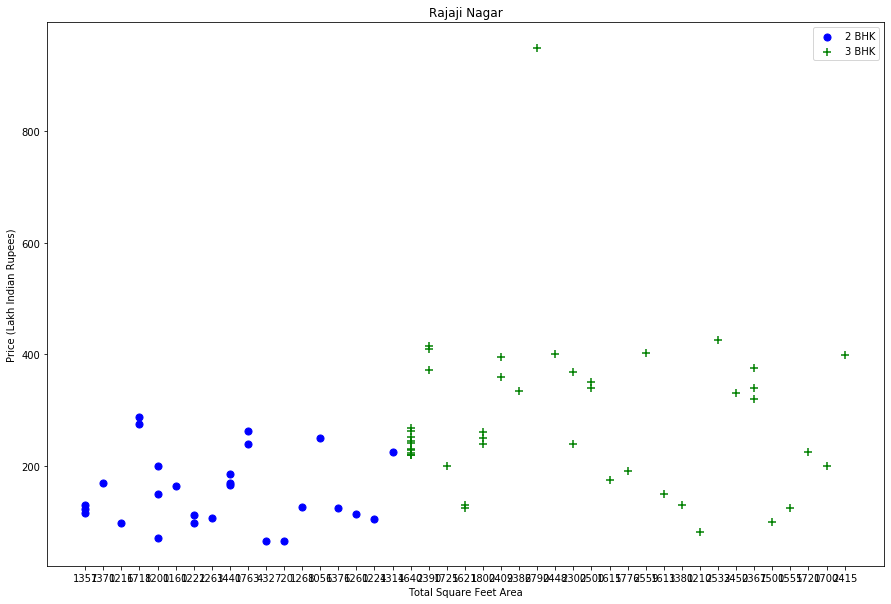

In [101]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Rajaji Nagar")

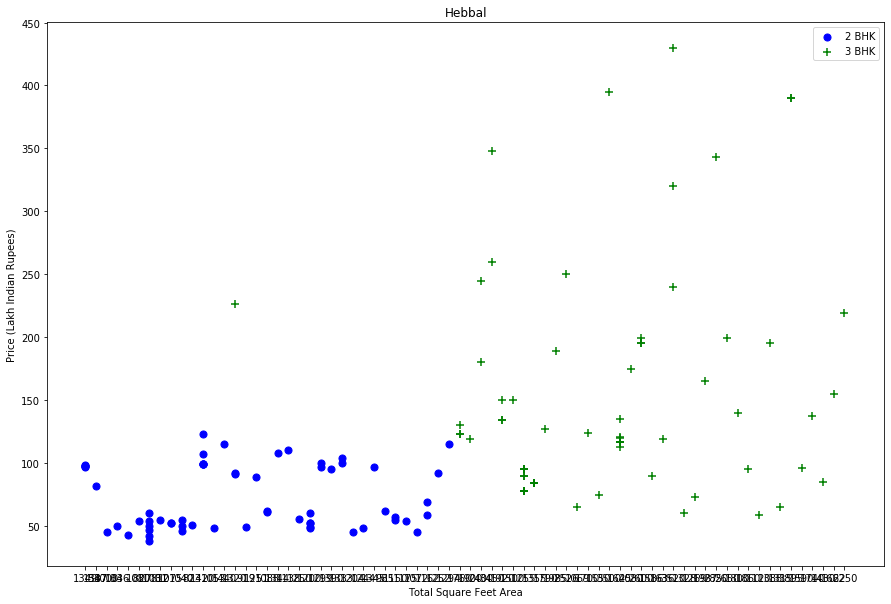

In [102]:
plot_scatter_chart(df5,"Hebbal")

In [112]:

X = df5.drop(['price'],axis='columns')
X.head(3)

,location,size,total_sqft,bath,bhk,total_sqrf
0,Electronic City Phase II,2 BHK,1056,2.0,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,3,1440.0


In [117]:
y = df5.price
y.head(3)


0     39.07
1    120.00
2     62.00
Name: price, dtype: float64

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [122]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
#lr_clf.fit(X_train,y_train)
#lr_clf.score(X_test,y_test)

In [138]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]


In [140]:
#